# Predict and verify task completion times study
### Author: Claudia, Sarah
### Reviewer: Sarah

## Test Design
We conduct a study in which we measure the task completion time of four calculating tasks and compare them with our own KLM operator values and the ones from Card, Moran and Newell (1980). For this purpose, we created a calculator and used our result from our previous experiment which determined our KLM values. The study was performed at home with a notebook, an external keyboard (with numpad and Qwertz design) and a mouse. 

The study uses a within-subject design whereby each participant solved all the four tasks once to minimize learning effects. 

In order to mitigate confounding and random variables the tasks of the study were presented in a counter balanced order (see Balanced Latin Squares at https://cs.uwaterloo.ca/~dmasson/tools/latin_square/). 

### Tasks
The four tasks are:
- Task A: adding the numbers from 1 to 20 using only the mouse
- Task B: adding the numbers from 1 to 20 using only the keyboard
- Task C: calculating the result of (3² + 4²) * 15.2 using only the mouse
- Task D: calculating the result of (3² + 4²) * 15.2 using only the keyboard

### Procedure
First, the participant was asked about his/her age, occupation and his/her gender was noted. The procedure of the study was explained to him/her and any questions were clarified. 
Afterwards the participants solved the tasks above in counter balanced order. 
Each participant carried out the study four times to obtain plenty of data.
For each task, the configuration file was adapted and then the calculator script was executed. The participant id, an abbreviation for the task name, the input type, the input value and the timestamp are logged.

### Participants
Due to the current pandemic situation and limited time the selection of participants is constrained.
The study was conducted with four participants (two female, two male). Among them were two media informatics students, one mathematics student and one software engineer. The ages of the participants were 20, 22, 25 and 38.
In order to obtain a lot of data, each participant performed the study four times.

### Variables
The dependent variable is the task completion time which is calculated from the logged timestamps. 
The independent variables are the tasks and the input type (mouse or keyboard).
As control variables we document the keyboard, mouse and the global position of the window in the centre of the screen. 

# Analysis

### Import all relevant libraries

In [1]:
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from PyQt5.QtCore import QDateTime
from PyQt5.QtCore import Qt

### All csv column names and csv values that are used more than once as variables

In [3]:
# column names
PARTICIPANT_ID = "participant_id"
TASK = "task"
INPUT_TYPE = "input_type"
TIMESTAMP = "timestamp"
TASK_COMPLETION_TIME = "task_completion_time_in_s"
MEASUREMENT = "measurement"

# some table values
INPUT_MOUSE = "button_clicked"
INPUT_KEYBOARD = "key_pressed"

TASK_A = "A"
TASK_B = "B"
TASK_C = "C"
TASK_D = "D"


STANDARD = "standard"
CUSTOM_SET = "custom_set"
EXPERIMENT = "experiment"

## Calculate task completion time

In [4]:
def calc_time_diff(data):
    start_time = QDateTime.fromString(data[TIMESTAMP][0], Qt.ISODateWithMs)
    start_time_in_ms = QDateTime.toMSecsSinceEpoch(start_time)
    
    number = len(data) - 1
    end_time = QDateTime.fromString(data[TIMESTAMP][number], Qt.ISODateWithMs)
    end_time_in_ms = QDateTime.toMSecsSinceEpoch(end_time)
    
    return (end_time_in_ms - start_time_in_ms) / 1000

In [5]:
def update_table(new_table):
    new_table[TASK_COMPLETION_TIME] = np.NaN
    
    new_table.loc[len(new_table) - 1, TASK_COMPLETION_TIME] = calc_time_diff(new_table)
    new_table = new_table[new_table[TASK_COMPLETION_TIME].notna()][[PARTICIPANT_ID, TASK, INPUT_TYPE, TASK_COMPLETION_TIME]]
    
    return new_table

In [6]:
tables = {}
total_task_completion_times_tables = []

for i in range (1, 17):  
    # read in csv files
    raw_data_mouse_add = pd.read_csv("study_results/{num}_mouse_add.csv".format(num = i))
    raw_data_mouse_complex = pd.read_csv("study_results/{num}_mouse_complex.csv".format(num = i))
    raw_data_key_add = pd.read_csv("study_results/{num}_key_add.csv".format(num = i))
    raw_data_key_complex = pd.read_csv("study_results/{num}_key_complex.csv".format(num = i))
    
    # generate new tables based on raw data tables
    new_table_name_mouse_add = "time_diff_mouse_add_{num}".format(num = i)
    tables[new_table_name_mouse_add] = raw_data_mouse_add  
    
    new_table_name_mouse_complex = "time_diff_mouse_complex_{num}".format(num = i)
    tables[new_table_name_mouse_complex] = raw_data_mouse_complex  
    
    new_table_name_key_add = "time_diff_key_add_{num}".format(num = i)
    tables[new_table_name_key_add] = raw_data_key_add 
    
    new_table_name_key_complex = "time_diff_key_complex_{num}".format(num = i)
    tables[new_table_name_key_complex] = raw_data_key_complex  
    
    
    # calculate time difference and filter data
    tables[new_table_name_mouse_add] = update_table(tables[new_table_name_mouse_add])
    tables[new_table_name_mouse_complex] = update_table(tables[new_table_name_mouse_complex])
    tables[new_table_name_key_add] = update_table(tables[new_table_name_key_add])
    tables[new_table_name_key_complex] = update_table(tables[new_table_name_key_complex])
    
    # append the tables to total_task_completion_times_tables
    total_task_completion_times_tables.append(tables[new_table_name_mouse_add])
    total_task_completion_times_tables.append(tables[new_table_name_key_add])
    total_task_completion_times_tables.append(tables[new_table_name_mouse_complex])
    total_task_completion_times_tables.append(tables[new_table_name_key_complex])

### Create dataframes and filter them

In [7]:
total_task_completion_times = pd.concat(total_task_completion_times_tables)
total_task_completion_times.to_csv("study_results/total_task_completion_times.csv", index=False)

input_mouse = total_task_completion_times[total_task_completion_times[INPUT_TYPE] == INPUT_MOUSE]
input_keyboard = total_task_completion_times[total_task_completion_times[INPUT_TYPE] == INPUT_KEYBOARD]

task_a = total_task_completion_times[total_task_completion_times[TASK] == TASK_A]
task_b = total_task_completion_times[total_task_completion_times[TASK] == TASK_B]
task_c = total_task_completion_times[total_task_completion_times[TASK] == TASK_C]
task_d = total_task_completion_times[total_task_completion_times[TASK] == TASK_D]


## Compare estimates with real study
<p style="text-align: center;">Standard and own KLM time estimates for relevant operators</p>



|Operator|standard time (s)|experiment time (s)
|:-------|-----------------|-------------------
|Keystroke (k)|0.28|0.28| 
|Pointing with mouse (p)|1.1|0.73|
|Button press or release on mouse (b)|0.1|0.16|


<p style="text-align: center;"><br>Task completion time estimates for the four tasks including KLM operators</p>

|Task|KLM operators|standard time (s)|custom set average time (s)|experiment time (s)
|:---|-------------|-----------------|---------------------------|-------------------|
|A|51p51b51b|66.3|53.55|33.98|
|B|51k|14.28|14.28|13.33|
|C|15p15b15b|19.5|15.75|13.14|
|D|18k|5.04|5.04|9.14|

Task completion times estimates were calculated with klm.py.

In [8]:
real_task_completion_times_mean = {TASK_A: round(task_a[TASK_COMPLETION_TIME].mean(), 2),
                                   TASK_B: round(task_b[TASK_COMPLETION_TIME].mean(), 2),
                                   TASK_C: round(task_c[TASK_COMPLETION_TIME].mean(), 2),
                                   TASK_D: round(task_d[TASK_COMPLETION_TIME].mean(), 2)}
real_task_completion_times_mean

{'A': 33.98, 'B': 13.33, 'C': 13.14, 'D': 9.14}

### Statistics for relevant tables

In [9]:
total_task_completion_times.describe()

,participant_id,task_completion_time_in_s
count,64.000000,64.000000
mean,8.500000,17.462656
std,4.646214,10.401639
min,1.000000,5.878000
25%,4.750000,10.472750
50%,8.500000,12.949500
75%,12.250000,27.710000
max,16.000000,42.432000


In [10]:
input_mouse.describe()

,participant_id,task_completion_time_in_s
count,32.000000,32.000000
mean,8.500000,23.560000
std,4.683533,11.553443
min,1.000000,9.280000
25%,4.750000,11.173000
50%,8.500000,27.892000
75%,12.250000,33.016750
max,16.000000,42.432000


In [11]:
input_keyboard.describe()

,participant_id,task_completion_time_in_s
count,32.000000,32.000000
mean,8.500000,11.365312
std,4.683533,3.105242
min,1.000000,5.878000
25%,4.750000,8.917250
50%,8.500000,12.152500
75%,12.250000,13.936750
max,16.000000,15.988000


## Visualisation

### Boxplot for measured task completion times

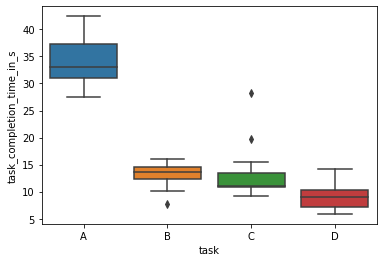

In [12]:
box_plot_tasks = sns.boxplot(
    data = total_task_completion_times,
    x = TASK,
    y = TASK_COMPLETION_TIME
)

box_plot_tasks.set(xlabel = TASK, ylabel = TASK_COMPLETION_TIME)
plt.show()

### Table for task completion times of standard KLM values, custom KLM values and measured values during study

In [18]:
compare_task_times = pd.read_csv("study_results/compare_task_completion_times.csv")
compare_task_times.sort_values(by=[TASK])

,measurement,task,task_completion_time_in_s
0,klm_standard_estimates,A,66.30
4,klm_experiment_estimates,A,53.55
8,real_task_completion_times_mean,A,33.98
1,klm_standard_estimates,B,14.28
5,klm_experiment_estimates,B,14.28
9,real_task_completion_times_mean,B,13.33
2,klm_standard_estimates,C,19.50
6,klm_experiment_estimates,C,15.75
10,real_task_completion_times_mean,C,13.14
3,klm_standard_estimates,D,5.04


### Bar plots to compare the three measurments for each task

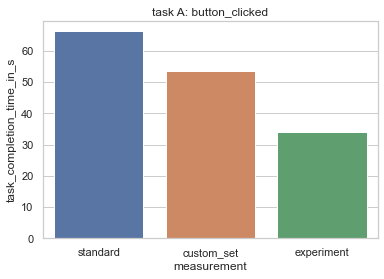

In [14]:
sns.set_theme(style = "whitegrid")
data_task_a = compare_task_times[compare_task_times[TASK] == TASK_A]

ax = sns.barplot(x = data_task_a[MEASUREMENT], 
                 y = data_task_a[TASK_COMPLETION_TIME], 
                 data = data_task_a).set_title(TASK + " " + TASK_A + ": " + INPUT_MOUSE)

plt.xticks([0, 1, 2], [STANDARD, CUSTOM_SET, EXPERIMENT])

plt.show()

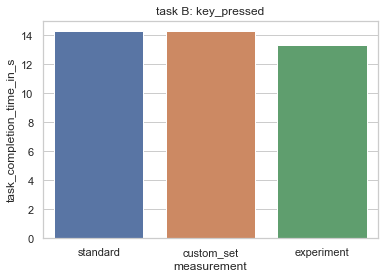

In [15]:
sns.set_theme(style = "whitegrid")
data_task_b = compare_task_times[compare_task_times[TASK] == TASK_B]

ax = sns.barplot(x = data_task_b[MEASUREMENT], 
                 y = data_task_b[TASK_COMPLETION_TIME], 
                 data = data_task_b).set_title(TASK + " " + TASK_B + ": " + INPUT_KEYBOARD)

plt.xticks([0, 1, 2], [STANDARD, CUSTOM_SET, EXPERIMENT])

plt.show()

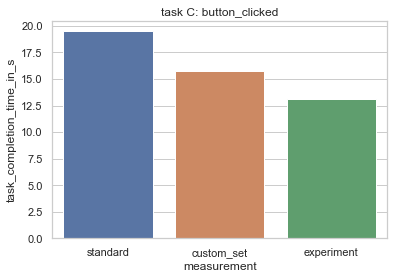

In [16]:
sns.set_theme(style = "whitegrid")
data_task_c = compare_task_times[compare_task_times[TASK] == TASK_C]

ax = sns.barplot(x = data_task_c[MEASUREMENT], 
                 y = data_task_c[TASK_COMPLETION_TIME], 
                 data = data_task_c).set_title(TASK + " " + TASK_C + ": " + INPUT_MOUSE)

plt.xticks([0, 1, 2], [STANDARD, CUSTOM_SET, EXPERIMENT])

plt.show()

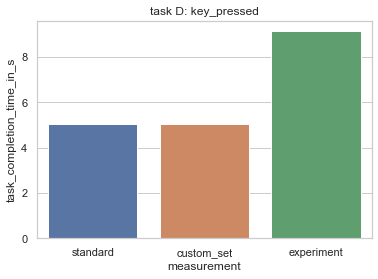

In [17]:
sns.set_theme(style = "whitegrid")
data_task_d = compare_task_times[compare_task_times[TASK] == TASK_D]

ax = sns.barplot(x = data_task_d[MEASUREMENT], 
                 y = data_task_d[TASK_COMPLETION_TIME], 
                 data = data_task_d).set_title(TASK + " " + TASK_D + ": " + INPUT_KEYBOARD)

plt.xticks([0, 1, 2], [STANDARD, CUSTOM_SET, EXPERIMENT])

plt.show()

## Results
In task A, where the participant had to add the numbers from one to twenty using the mouse, the measured time in the experiment was much lower than the value calculated for the task with standard KLM values as well as with the experimentally determined KLM values. This could be because the calculator buttons are close together and not scattered all over the screen. 
The same task performed with the keyboard (task B) shows almost no differences between the three groups. The task completion time in the experiment is slightly lower, which could be due to the fact that a numeric keypad was used for typing.
In task C, in which a calculation should be entered with the mouse, the time required in the experiment is less than for the standard KLM value and the experimentally determined KLM value. This could again be due to the fact that the distances between the buttons are relatively short. Another reason could be that by repeating the task the participants memorise the ways with the mouse and become faster.
If we consider task D, in which the calculation is to be entered using the keyboard, the task completion time in the experiment is higher than the two calculated KLM values. The reason for this is probably that you cannot use the numeric keypad for the brackets or powers and that the keys are far apart.

The times achieved in the experiment sometimes differ greatly from the times determined by standard and custom KLM. To find out the exact reasons for this, we would need to conduct further studies. 

## Discussion
The results must be viewed critically because the number of participants was very low. In addition, due to the current situation, each participant did the study four times, which might have an influence on the variance of the data. Furthermore, learning effects cannot be excluded due to the repetitions, but this should not be seen as problematic, since the experiment was designed for experts who have knowledge from the outset.
What should not be forgotten is that the tasks require metal demand for remembering the numbers, but this has not been included in the calculation. In order to reduce this, however, the test persons repeated the tasks four times.